# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)
Naomi Padilla Mora
A01745914



# Introducción

En el siguiente proyecto, se desarrollará un modelo de clasificación binaria diseñado para distinguir entre dos importantes miembros del reino de los insectos: las abejas y las avispas.

Las abejas desempeñan un papel vital en la ecología y el equilibrio de nuestro ecosistema, ya que son agentes polinizadores esenciales para el crecimiento de las plantas. Sin embargo, las avispas representan una amenaza considerable para las abejas, ya que a menudo invaden sus panales.

Al implementar un modelo convolucional (CNN) se busca desarrollar una arquitectura neuronal capáz de identificar entre una abeja y una avispa. Este resulta un problema complejo ya estos son muy similares entre si, tiene colores y una anatomía muy similar. Por lo que se explorarán diversas arquitecturas, optimizadores y variación de parámetros para la obtención de resultados.

El propósito de este proyecto es utilizar la capacidad de la inteligencia artificial para identificar de manera eficiente cada uno de estos insectos. Al lograr esta clasificación, podría aplicarse a soluciones biológicas destinadas a proteger el ecosistema y promover la reproducción de las abejas, al mismo tiempo que se establecer un mecanismo eficaz para reconocer y controlar la presencia de avispas, evitando así su interferencia en las colonias de abejas.



# Librerias

In [1]:
#instalar kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, shutil, pathlib
from keras import layers
from sklearn.datasets import load_sample_image
from keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dropout, BatchNormalization

%matplotlib inline

# Datos

## Kaggle
Importamos la base de datos desde Kaggle

In [3]:
#seleccionar el key de kaggle (kaggle.json)
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naomipadillamora","key":"a00cb5ca067ad5fb6ec3b031ff601335"}'}

In [4]:
#configure kaggle library
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36           1005        112  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           3704         76  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1380        106  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT P

In [5]:
#Descarga de la base de datos
!kaggle datasets download -d jerzydziewierz/bee-vs-wasp

 98% 547M/559M [00:08<00:00, 82.9MB/s]
100% 559M/559M [00:08<00:00, 67.3MB/s]


In [6]:
# Descomprimir archivo bee-vs-wasp.zip
!unzip bee-vs-wasp.zip -d "/content/kaggledb"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/576513.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/576622.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/576810.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/576855.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/576993.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577087.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577126.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577128.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577283.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577310.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577643.jpg  
  inflating: /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect/577807.jpg

In [7]:
# Eliminamos las carpteas que no se utilizaran y aseguramos que se vuelva un problema binario y no de clasificación
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/example_notebook
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/label_generator
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/other_insect
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/other_noinsect
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/bee2
!rm -r /content/kaggledb/kaggle_bee_vs_wasp/wasp1/

In [8]:
#Renombraremos las imagénes de cada clase con el objetivo de facilitar su separación en train, test y val más adelante.
# Directorio que contiene las imágenes de abejas
folder_path = '/content/kaggledb/kaggle_bee_vs_wasp/bee1'

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

# Iterar a través de los archivos y renombrarlos
for i, filename in enumerate(files):
    # Nuevo nombre de archivo
    new_name = f"bee.{i+1}.jpg"

    # Ruta del archivo original para reemplazar con el nuevo nombre
    old_path = os.path.join('/content/kaggledb/kaggle_bee_vs_wasp/bee1', filename)
    new_path = os.path.join('/content/kaggledb/kaggle_bee_vs_wasp/bee1', new_name)

    # Renombre del archivo
    os.rename(old_path, new_path)


In [9]:
# Directorio que contiene las imágenes de avispas
folder_path = '/content/kaggledb/kaggle_bee_vs_wasp/wasp2'

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

for i, filename in enumerate(files):
    new_name = f"wasp.{i+1}.jpg"

    old_path = os.path.join('/content/kaggledb/kaggle_bee_vs_wasp/wasp2', filename)
    new_path = os.path.join('/content/kaggledb/kaggle_bee_vs_wasp/wasp2', new_name)

    os.rename(old_path, new_path)

In [10]:
# Unimos ambas carpetas en una sola
# Rutas de las carpetas de origen y destino
bee_path = '/content/kaggledb/kaggle_bee_vs_wasp/bee1'
wasp_path = '/content/kaggledb/kaggle_bee_vs_wasp/wasp2'
bee_vs_wasp_path = '/content/kaggledb/kaggle_bee_vs_wasp/bee_vs_wasp'

# Copia de los archivos de la carpeta bee1 a la carpeta resultado
shutil.copytree(bee_path, bee_vs_wasp_path)

# Copiar los archivos de la carpeta wasp2 a la carpeta resultado
shutil.copytree(wasp_path, bee_vs_wasp_path, dirs_exist_ok=True)


'/content/kaggledb/kaggle_bee_vs_wasp/bee_vs_wasp'

In [11]:
# Dividimos la base en train, validation y test, usando 2450 imagenes de cada categoría (bee, wasp).
# Rutas de las carpetas de origen y destino
original_dir = pathlib.Path("/content/kaggledb/kaggle_bee_vs_wasp/bee_vs_wasp")
new_base_dir = pathlib.Path("bee_vs_wasp_split")

def make_subset(subset_name, start_index, end_index):
    for category in ("bee", "wasp"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# Los porcentajes son: 70% train, 15% validation, 15% test
make_subset("train", start_index=1, end_index=1715)
make_subset("validation", start_index=1715, end_index=2083)
make_subset("test", start_index=2083, end_index=2450)

In [12]:
original_dir = pathlib.Path("/content/kaggledb/kaggle_bee_vs_wasp/bee_vs_wasp")
new_base_dir = pathlib.Path("bee_vs_wasp_split")

Ahora la carpeta bee_vs_wasp_split esta lista con las tres carpetas de train, test y validation que contienen la misma cantidad de imagenes de abejas y de avispas. Dando un total de 4900 imágenes.

# Desarrollo del Modelo

## Primera arquitectura

Esta primera arquitectura suele ser una arquitectura convencional de la que partiremos para las mejoras del modelo.

Esta recibe (input) imágenes de 180x180 px que suele ser uno de los valores estándar en las bases de datos que podemos encontrar en la plataforma Kaggle.

La red se encuentra conformada por 12 capas, comenzando por un rescaling de cada pixel que permite normalizar las imágenes.

La aplicación de capas Conv2D permite la detección de características y elementos importantes en cada imagen como bordes o texturas a tarvés del filtro aplicado, que en este caso se va aumentando para que cada vez tome detalles de un área más grande. Esto a través de un Kernel de 3x3 el cual tiene la dimensión suficiente para extraer los detalles sin que sea en rangos muy pequeños para no distinguir a grandes rasgos, ni tan grande como pa no ser capaz de distinguir detalles.

Estas capas utilizan la activación reLU la cual se caracteriza por no permitir la linealidad en el aprendizaje del modelo favoreciendo al reconocimiento de los datos debido a la gran similitud entre las abejas y las avispas. Además de que su costo computacional es mucho menor al de otros métodos de activación.

La aplicación de capas de MaxPooling2D reduce la definición de la imagen a 2x2 permitiendo mantener los detalles y a su vez, evita el sobreajuste o overfitting.

La capa flatten vuelve el resultado unidimensional para poder aplicar una capa densa que se encarga de realizar la clasificación binaria gracias a la activación sigmoid.





In [13]:
model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.Flatten(),
                          layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

Con la siguiente línea aplicamos el modelo con la arquitectura antes mencionada, usamos la función de loss Binary_crossentropy que nos permite apreciar que tan bien se desempeña el modelo al realizar una clasificación binaria (abeja vs avispa). También le agregamos el optimizador que permite el ajuste de la pérdida a lo largo del entrenamiento, en este caso el Root Mean Square Propagation (RMSProp) para que la red aprenda más rápido y sea más estable. Además, agregamos la métrica accuracy para conocer la precisión del modelo al momento de hacer la clasificación.

In [14]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [15]:
# Cargamos las respectivas bases de datos, damos las dimensiones y las dividimos en grupos de 32 para entrenar, validad y probar el modelo.
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3428 files belonging to 2 classes.
Found 736 files belonging to 2 classes.
Found 734 files belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


### Entrenamiento

Se utiliza el ModelCheckpoint para que se guarde el modelo solo es su puntaje más alto y no se quede con el último valo que puede ser más bajo que los anteriores, la métrica es el val_loss. Comenzaremos el modelo 10 epocas para experimentar y ver su desempeño.

In [17]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch", save_best_only=True, monitor="val_loss")]

history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/10
108/108 [==============================] - 22s 102ms/step - loss: 0.5618 - accuracy: 0.7214 - val_loss: 0.4402 - val_accuracy: 0.8220
Epoch 2/10
108/108 [==============================] - 9s 82ms/step - loss: 0.3826 - accuracy: 0.8375 - val_loss: 0.4410 - val_accuracy: 0.8220
Epoch 3/10
108/108 [==============================] - 9s 76ms/step - loss: 0.3505 - accuracy: 0.8541 - val_loss: 0.3567 - val_accuracy: 0.8505
Epoch 4/10
108/108 [==============================] - 10s 89ms/step - loss: 0.3062 - accuracy: 0.8679 - val_loss: 0.3510 - val_accuracy: 0.8546
Epoch 5/10
108/108 [==============================] - 10s 90ms/step - loss: 0.2755 - accuracy: 0.8921 - val_loss: 0.2999 - val_accuracy: 0.9008
Epoch 6/10
108/108 [==============================] - 8s 75ms/step - loss: 0.2537 - accuracy: 0.9049 - val_loss: 0.2657 - val_accuracy: 0.8886
Epoch 7/10
108/108 [==============================] - 10s 90ms/step - loss: 0.2276 - accuracy: 0.9122 - val_loss: 0.2250 - val_accuracy: 0

En este caso, el modelo con el que se quedará será el de la epoch = 9 ya quiere los valores mas bajos en loss tanto en training como en validation.

En la siguientes gráficas podemos observar la comparativa de desempeño del modelo en cada epoca entre el entrenamiento y la validación en loss y en accuracy.

De este gráfico podemos notar que a lo largo entrenamiento de la neurona tiene fluctuaciones muy drásticas entre cada época, esto no es muy bueno ya que puede representar que se desprecia lo que la neurona aprende entre un set de imagenes a otro, indicando que realmente no esta aprendiendo lo suficiente para dar un modelo de exactitud. Sin embargo, para la baja cantidad de épocas, el modelo tiene un desempeño considerablemente bueno.

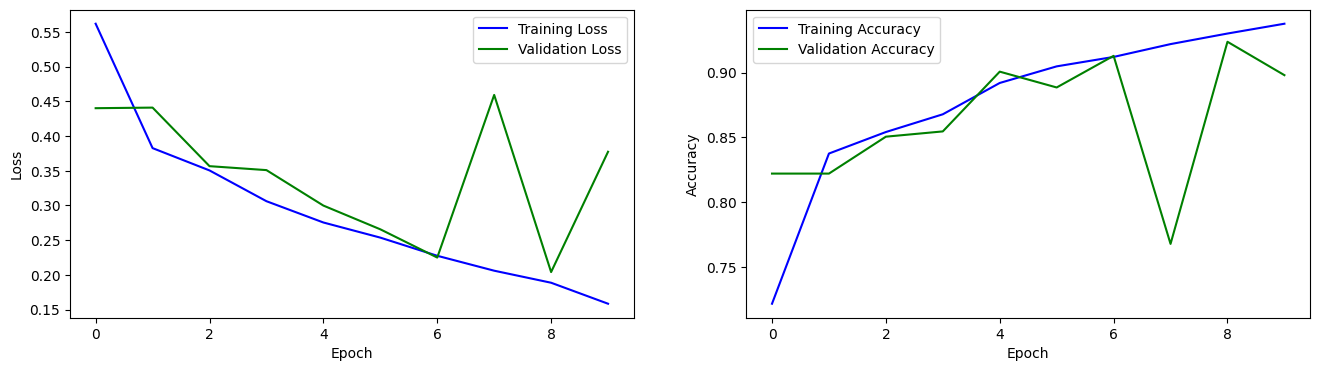

In [18]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluación del modelo

Finalmente, evaluamos el desempeño del modelo con la base de datos de prueba (test) y podemos obtener un puntaje bastante aceptable de 0.918 en accuracy. Sin embargo, ya que obtenemos mejor puntaje de entrenamiento el modelo presenta un nivel considerable de overfitting, implicando que este aun no generaliza bien por el sobreajuste.

In [19]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

23/23 [==============================] - 2s 51ms/step - loss: 0.2239 - accuracy: 0.9346
Test accuracy: 0.935


# Ajuste del modelo: Data Augmentation

Como primera mejora aplicaremos un Data Augmentation al modelo, la cual se caracteriza por multiplicar la cantidad de imágenes que tenemos haciendo cambios en la original, en este caso la orientación y el zoom en la imagen.

In [20]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2)], name='data_augmentation')

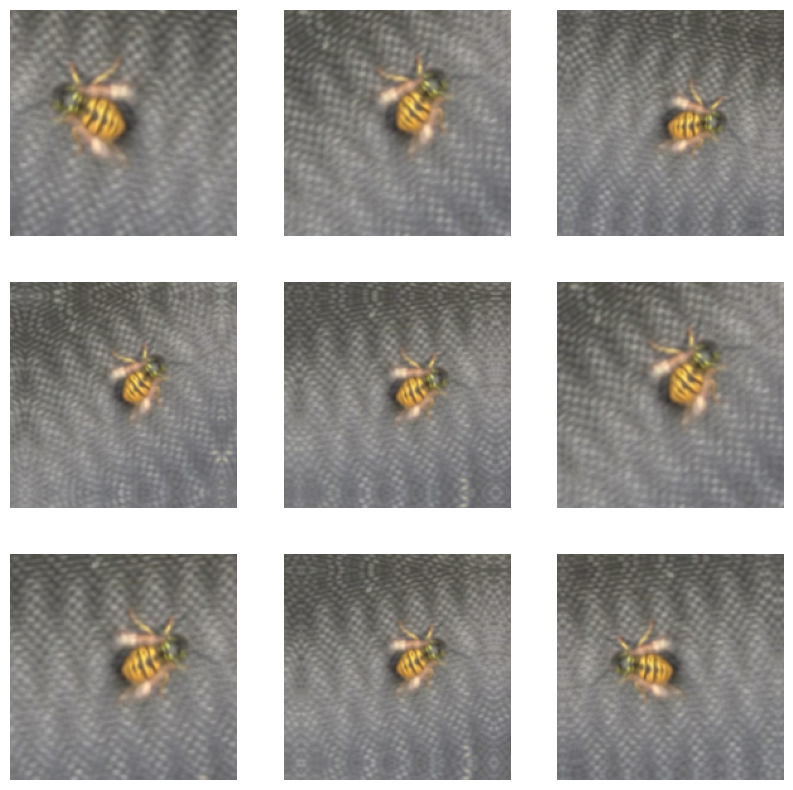

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images) # Keras functional API
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Aplicamos la misma arquitectura solo le agregamos el data_augmentation antes del rescaling para evaluar la mejora que este tiene por si solo en el modelo.

In [22]:
model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          data_augmentation,
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.Flatten(),
                          layers.Dense(1, activation="sigmoid")])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 180, 180, 3)       0         
 ial)                                                            
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)       

Mantenemos los mismos parámetros al momento de compilar el modelo y en su entrenamiento para comparar resultados. Solo se aumentará el número de épocas a 20 para observar el comportamiento del modelo.

In [23]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [24]:
#entrenamiento
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation",
    save_best_only=True, monitor="val_loss")]

history = model.fit(train_dataset, epochs=20,
                    validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/20
108/108 [==============================] - 12s 83ms/step - loss: 0.5490 - accuracy: 0.7208 - val_loss: 0.4857 - val_accuracy: 0.8342
Epoch 2/20
108/108 [==============================] - 11s 101ms/step - loss: 0.3906 - accuracy: 0.8317 - val_loss: 0.3490 - val_accuracy: 0.8356
Epoch 3/20
108/108 [==============================] - 11s 97ms/step - loss: 0.3597 - accuracy: 0.8346 - val_loss: 0.3073 - val_accuracy: 0.8628
Epoch 4/20
108/108 [==============================] - 8s 73ms/step - loss: 0.3196 - accuracy: 0.8603 - val_loss: 0.4581 - val_accuracy: 0.8424
Epoch 5/20
108/108 [==============================] - 8s 68ms/step - loss: 0.3173 - accuracy: 0.8722 - val_loss: 0.3532 - val_accuracy: 0.8370
Epoch 6/20
108/108 [==============================] - 10s 89ms/step - loss: 0.2823 - accuracy: 0.8906 - val_loss: 0.2354 - val_accuracy: 0.9226
Epoch 7/20
108/108 [==============================] - 9s 83ms/step - loss: 0.2694 - accuracy: 0.8964 - val_loss: 0.5526 - val_accuracy: 0

En las gráficas comparativas aún podemos ver un par de picos bastante considerables en la validación tanto en el loss como en el accuracy, demostrando que el modelo aún puede mejorar, agregando que el modelo aun presenta un sobreajuste a los datos.

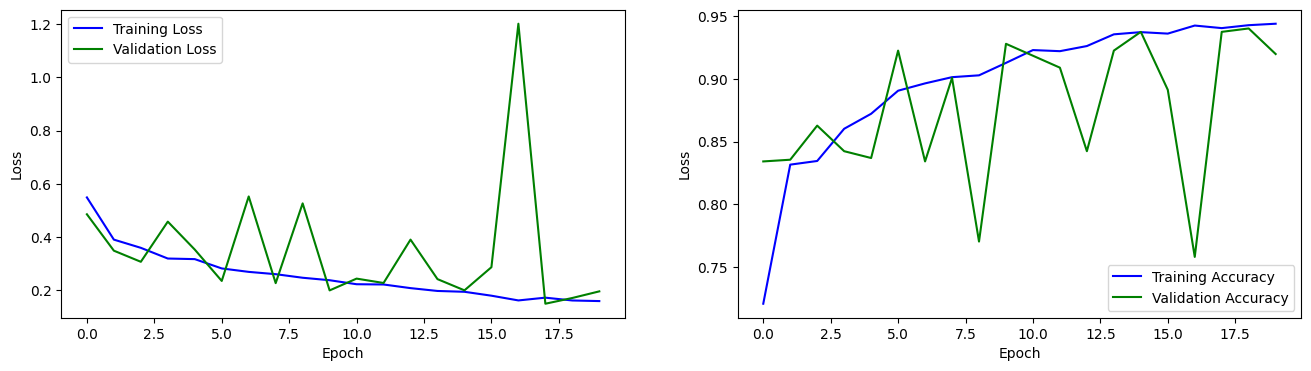

In [25]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

23/23 [==============================] - 2s 61ms/step - loss: 0.1594 - accuracy: 0.9469
Test accuracy: 0.947


In [27]:
prediction = model.predict(validation_dataset)
prediction_labels = []
for i in prediction:
    if i >0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)

23/23 [==============================] - 2s 40ms/step


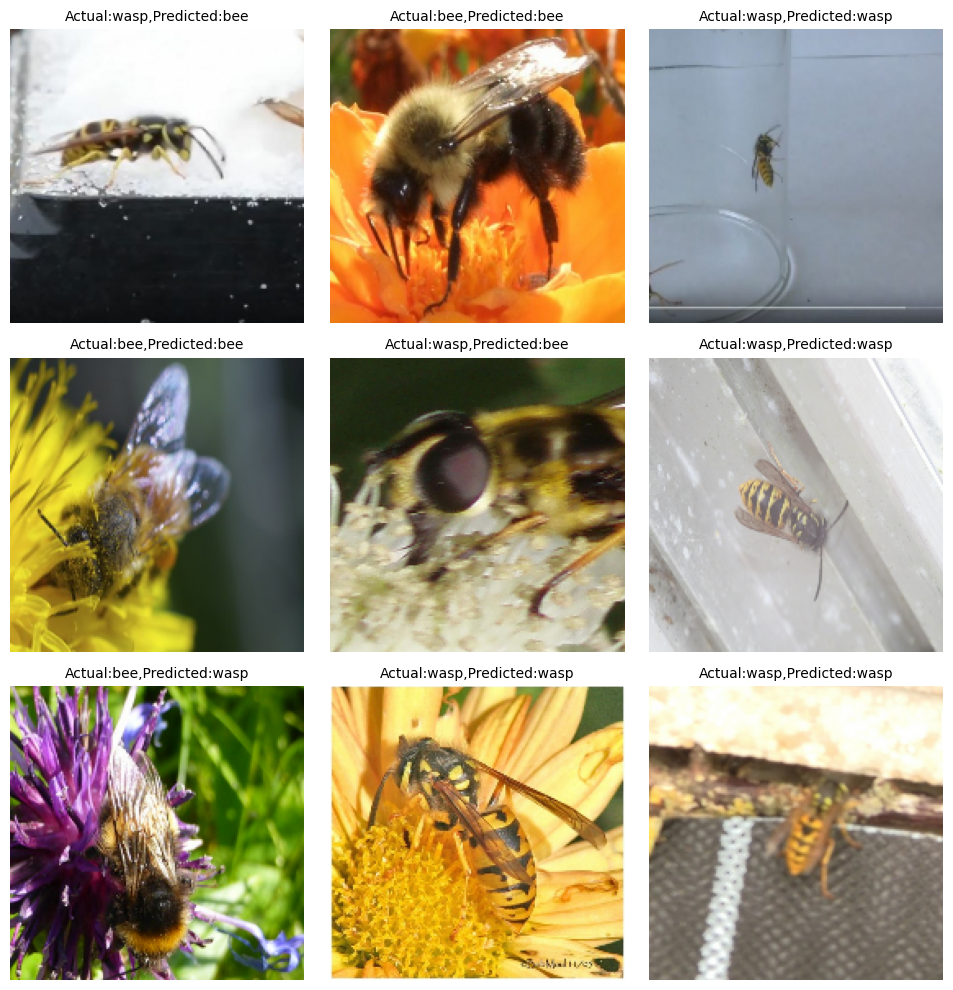

In [28]:
plt.figure(figsize=(10,10))
for images,labels in validation_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{validation_dataset.class_names[labels[i]]},Predicted:{validation_dataset.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()

En las imágenes anteriores podemos notar que el modelo predice 4 de cada 9 imagenes de manera correcta, siendo aún deficiente.

# Ajuste del modelo: Data Augmentation y cambios en la Arquitectura

El cambio que se realizará en la arquitectura es la **adición de una capa de dropout**. La capa de Dropout tiene la función de desactivar aleatoriamente el 50% de las neuronas durante el entrenamiento. Esta para prevenir el sobreajuste y que no generalice bien a nuevos datos. El Dropout ayuda a evitar que las neuronas se vuelvan demasiado dependientes de las demás, lo que mejora la generalización y el rendimiento en datos de validación y prueba.

In [29]:
model = keras.Sequential([
    keras.Input(shape=(180, 180, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(128, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(256, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(256, kernel_size=3, activation="relu"),
    layers.Flatten(),
    layers.Dropout(0.5),  # Capa de Dropout con una tasa del 50%
    layers.Dense(1, activation="sigmoid")
])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 180, 180, 3)       0         
 ial)                                                            
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)       

In [30]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [31]:
#entrenamiento
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation",
    save_best_only=True, monitor="val_loss")]

history = model.fit(train_dataset, epochs=30,
                    validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 19s 147ms/step - loss: 0.5295 - accuracy: 0.7243 - val_loss: 0.4578 - val_accuracy: 0.7908
Epoch 2/30
108/108 [==============================] - 12s 107ms/step - loss: 0.3837 - accuracy: 0.8308 - val_loss: 0.3116 - val_accuracy: 0.8655
Epoch 3/30
108/108 [==============================] - 11s 99ms/step - loss: 0.3424 - accuracy: 0.8445 - val_loss: 0.2979 - val_accuracy: 0.8682
Epoch 4/30
108/108 [==============================] - 10s 85ms/step - loss: 0.3019 - accuracy: 0.8743 - val_loss: 0.4882 - val_accuracy: 0.8220
Epoch 5/30
108/108 [==============================] - 8s 70ms/step - loss: 0.2858 - accuracy: 0.8880 - val_loss: 0.3367 - val_accuracy: 0.8546
Epoch 6/30
108/108 [==============================] - 9s 84ms/step - loss: 0.2769 - accuracy: 0.8903 - val_loss: 0.4251 - val_accuracy: 0.8152
Epoch 7/30
108/108 [==============================] - 9s 77ms/step - loss: 0.2739 - accuracy: 0.8921 - val_loss: 0.3483 - val_accuracy: 

# Resultados

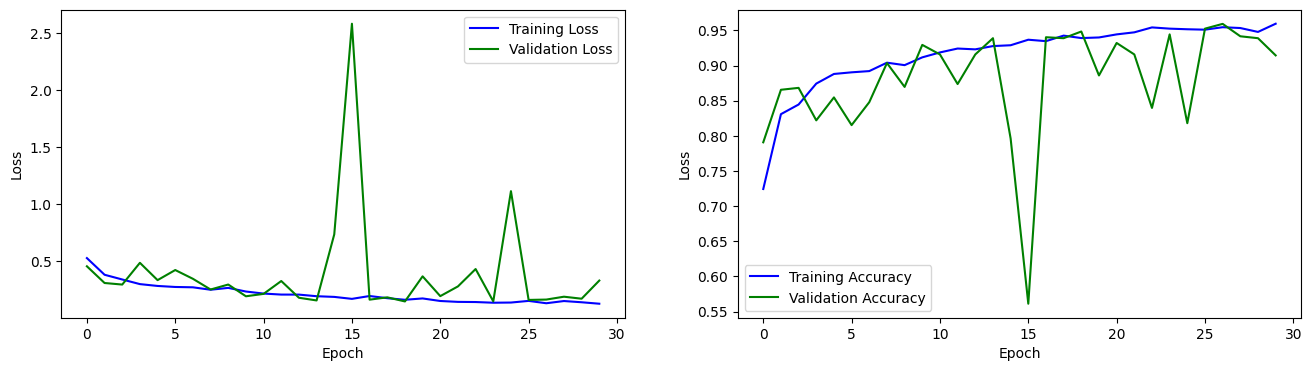

In [37]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

23/23 [==============================] - 1s 37ms/step - loss: 0.1424 - accuracy: 0.9496
Test accuracy: 0.950


Como es posible observar en los puntajes y los gráficos, la capa de dropout efectivamente beneficio a que el modelo pueda generalizar a datos nuevos. Al final de gráfico de loss y accuracy se aprecia como el train y valdidation alcanzan valores muy similares, incluso posteriormente al pico, el modelo se estabiliza y las fluctuaciones son menos agresivas.

In [34]:
prediction = model.predict(validation_dataset)
prediction_labels = []
for i in prediction:
    if i >0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)

23/23 [==============================] - 1s 38ms/step


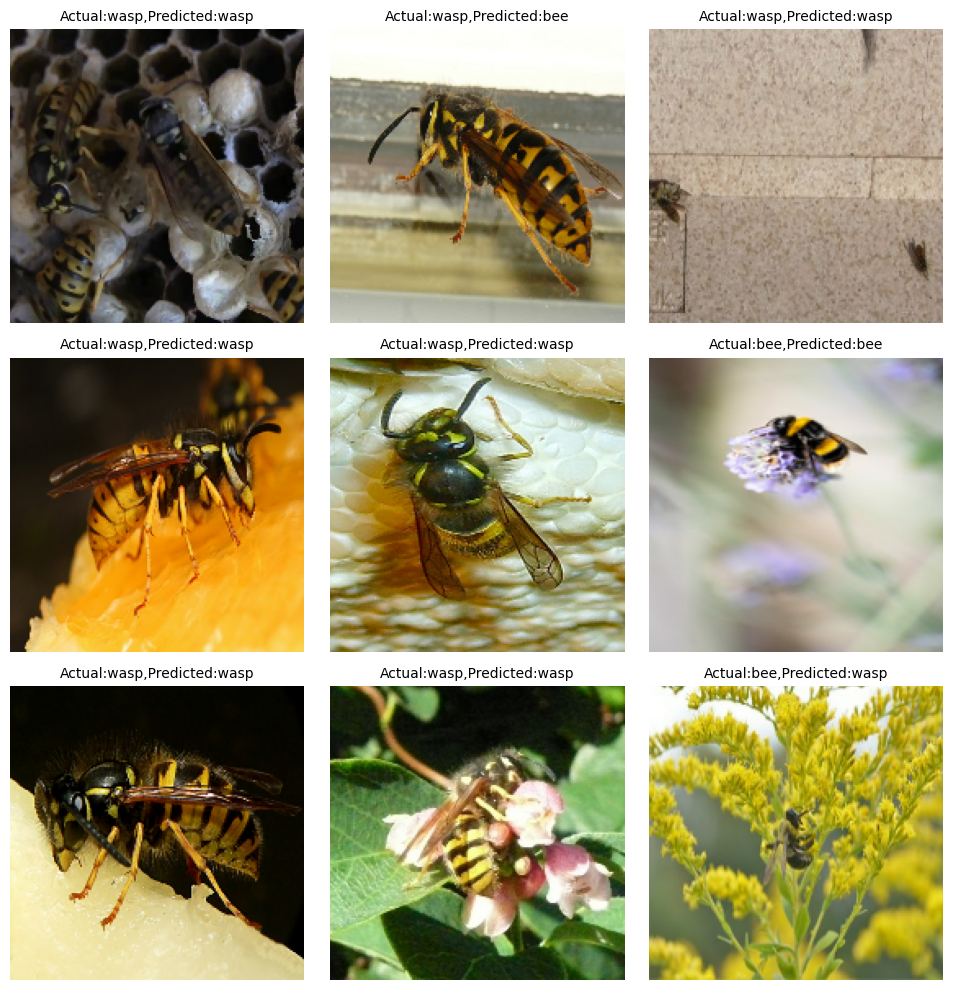

In [35]:
plt.figure(figsize=(10,10))
for images,labels in validation_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{validation_dataset.class_names[labels[i]]},Predicted:{validation_dataset.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()

Podemos observar una clasificación correcta de 6 de 9 fotografías de abejas y avispas.

Tras experimentar con las arquitecturas para el entrenamiento de la neurona se puede afirmar lo siguiente:


*   El modelo con mejores resultados fue al que se le aplicó Data Augmentation y se agregó una capa de Droupout de salida. Esto de explica debido a que la cantidad de imágenes y variaciones que genera de DataAugmentation y la desactivación aleatoria de las neuronas por parte de Droupout que permite disminuir el nivel de sobreajuste.
*   El modelo tiene un puntaje considerablemente bueno para la clasificación binaria pero puede seguirse mejorando ya que parece muestra mayor facilidad para identificar avispas que abejas, sobre todo cuando estan lejos o no se aprecian sus detalles.



# Predicciones

En este apartado cargaremos una nueva base de datos de abejas y avisas (11 imágenes de c/u) para probar el desempeño del modelo en datos no antes vistos por el mismo.

In [38]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bees.zip to bees.zip
User uploaded file "bees.zip" with length 10041590 bytes


In [39]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving wasp.zip to wasp.zip
User uploaded file "wasp.zip" with length 338284 bytes


In [52]:
import zipfile
import os

# Ruta del archivo ZIP en Google Drive
zip_file_path = '/content/bees.zip'

# Directorio de destino para la descompresión
extracted_folder = '/content/bees'

# Crear el directorio si no existe
os.makedirs(extracted_folder, exist_ok=True)

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Descompresión completada en:", extracted_folder)

Descompresión completada en: /content/bees


In [41]:
# Ruta del archivo ZIP en Google Drive
zip_file_path = '/content/wasp.zip'

# Directorio de destino para la descompresión
extracted_folder = '/content/wasp'

# Crear el directorio si no existe
os.makedirs(extracted_folder, exist_ok=True)

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Descompresión completada en:", extracted_folder)

Descompresión completada en: /content/wasp


In [53]:
#Renombraremos las imagénes de cada clase con el objetivo de facilitar su separación en train, test y val más adelante.
# Directorio que contiene las imágenes de abejas
folder_path = '/content/bees/bees'

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

# Iterar a través de los archivos y renombrarlos
for i, filename in enumerate(files):
    # Nuevo nombre de archivo
    new_name = f"bee{i+1}.jpg"

    # Ruta del archivo original para reemplazar con el nuevo nombre
    old_path = os.path.join('/content/bees/bees', filename)
    new_path = os.path.join('/content/bees/bees', new_name)

    # Renombre del archivo
    os.rename(old_path, new_path)

In [49]:
#Renombraremos las imagénes de cada clase con el objetivo de facilitar su separación en train, test y val más adelante.
# Directorio que contiene las imágenes de abejas
folder_path = '/content/wasp/wasp'

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

# Iterar a través de los archivos y renombrarlos
for i, filename in enumerate(files):
    # Nuevo nombre de archivo
    new_name = f"wasp{i+1}.jpg"

    # Ruta del archivo original para reemplazar con el nuevo nombre
    old_path = os.path.join('/content/wasp/wasp', filename)
    new_path = os.path.join('/content/wasp/wasp', new_name)

    # Renombre del archivo
    os.rename(old_path, new_path)

In [70]:
# Unimos ambas carpetas en una sola
# Rutas de las carpetas de origen y destino
bees_predicciones_path = '/content/bees/bees'
wasp_predicciones_path = '/content/wasp/wasp'
predicciones_path = '/content/predicciones'

# Copia de los archivos de la carpeta bee1 a la carpeta resultado
shutil.copytree(bees_predicciones_path, predicciones_path)

# Copiar los archivos de la carpeta wasp2 a la carpeta resultado
shutil.copytree(wasp_predicciones_path, predicciones_path, dirs_exist_ok=True)


'/content/predicciones'

In [71]:
import os

# Directorio que contiene las imágenes de abejas 13 a 83
folder_path = '/content/predicciones'

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

# Filtrar los archivos que cumplen con la condición de eliminación
files_to_delete = [file for file in files if file.startswith('bee') and file.endswith('.jpg') and 13 <= int(file[3:-4]) <= 83]

# Eliminar los archivos
for file_to_delete in files_to_delete:
    file_path = os.path.join(folder_path, file_to_delete)
    os.remove(file_path)
    print(f"Eliminado: {file_path}")

print("Eliminación completada.")


Eliminado: /content/predicciones/bee66.jpg
Eliminado: /content/predicciones/bee81.jpg
Eliminado: /content/predicciones/bee71.jpg
Eliminado: /content/predicciones/bee39.jpg
Eliminado: /content/predicciones/bee50.jpg
Eliminado: /content/predicciones/bee72.jpg
Eliminado: /content/predicciones/bee55.jpg
Eliminado: /content/predicciones/bee53.jpg
Eliminado: /content/predicciones/bee61.jpg
Eliminado: /content/predicciones/bee31.jpg
Eliminado: /content/predicciones/bee63.jpg
Eliminado: /content/predicciones/bee79.jpg
Eliminado: /content/predicciones/bee42.jpg
Eliminado: /content/predicciones/bee59.jpg
Eliminado: /content/predicciones/bee15.jpg
Eliminado: /content/predicciones/bee24.jpg
Eliminado: /content/predicciones/bee78.jpg
Eliminado: /content/predicciones/bee76.jpg
Eliminado: /content/predicciones/bee62.jpg
Eliminado: /content/predicciones/bee60.jpg
Eliminado: /content/predicciones/bee49.jpg
Eliminado: /content/predicciones/bee56.jpg
Eliminado: /content/predicciones/bee29.jpg
Eliminado: 

In [73]:
import os
import re


# Directorio que contiene las imágenes de abejas 13 a 15
folder_path = '/content/predicciones'

# Expresión regular para encontrar números en el nombre del archivo
number_pattern = re.compile(r'\d+')

# Obtener una lista de archivos en el directorio
files = os.listdir(folder_path)

# Filtrar los archivos que cumplen con la condición de eliminación
files_to_delete = [file for file in files if file.startswith('wasp') and file.endswith('.jpg') and 13 <= int(number_pattern.search(file).group()) <= 15]

# Eliminar los archivos
for file_to_delete in files_to_delete:
    file_path = os.path.join(folder_path, file_to_delete)
    os.remove(file_path)
    print(f"Eliminado: {file_path}")

print("Eliminación completada.")

Eliminado: /content/predicciones/wasp13.jpg
Eliminado: /content/predicciones/wasp15.jpg
Eliminado: /content/predicciones/wasp14.jpg
Eliminación completada.


In [74]:
from PIL import Image
import os

# Directorio que contiene las imágenes en formato JPG
input_folder = '/content/predicciones'

# Directorio de salida para las imágenes convertidas
output_folder = '/content/predicciones.jpeg'

# Asegúrate de que el directorio de salida exista
os.makedirs(output_folder, exist_ok=True)

# Lista de archivos en el directorio de entrada
jpg_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# Convertir cada imagen de JPG a PNG o JPEG y guardarla en el directorio de salida
for jpg_file in jpg_files:
    # Ruta de la imagen de entrada
    input_path = os.path.join(input_folder, jpg_file)

    # Nombre de archivo sin extensión
    filename_without_extension = os.path.splitext(jpg_file)[0]

    # Ruta de la imagen de salida en formato JPEG
    output_jpeg_path = os.path.join(output_folder, f"{filename_without_extension}.jpeg")

    # Abrir la imagen JPG
    img = Image.open(input_path)

    # Guardar la imagen en formato JPEG
    img.save(output_jpeg_path, format='JPEG')

print("Conversión completada.")


Conversión completada.


In [78]:
# Usando 12 imagenes de cada categoría (bee, wasp).
# Rutas de las carpetas de origen y destino
original_dir = pathlib.Path("/content/predicciones.jpeg")
new_base_dir = pathlib.Path("bee_vs_wasp_datos de predicción")

def make_subset(subset_name, start_index, end_index):
    for category in ("bee", "wasp"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}{i}.jpeg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("predicciones", start_index=1, end_index=12)

In [80]:
# Cargamos las respectivas bases de datos, damos las dimensiones para probar el modelo
predicciones_dataset = image_dataset_from_directory(
    new_base_dir / "/content/bee_vs_wasp_datos de predicción/predicciones",
    image_size=(180, 180))

Found 22 files belonging to 2 classes.


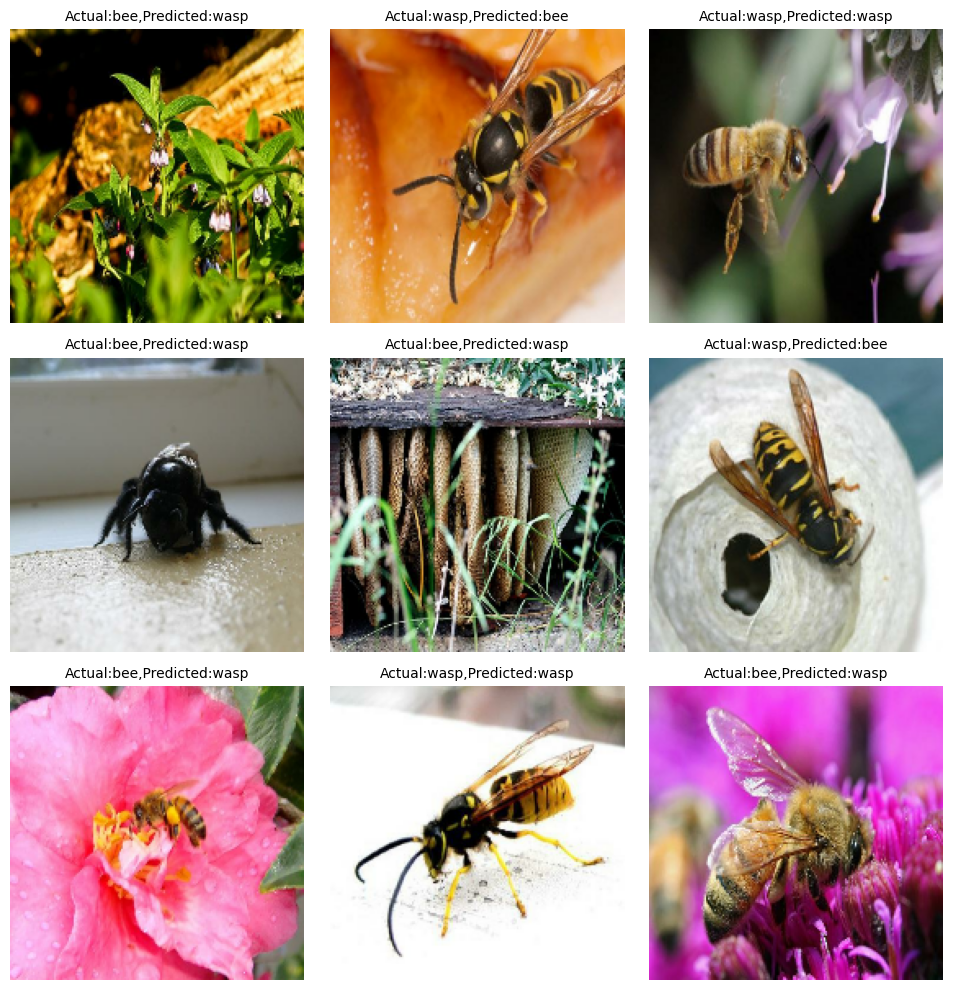

In [82]:
plt.figure(figsize=(10,10))
for images,labels in predicciones_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{predicciones_dataset.class_names[labels[i]]},Predicted:{predicciones_dataset.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()

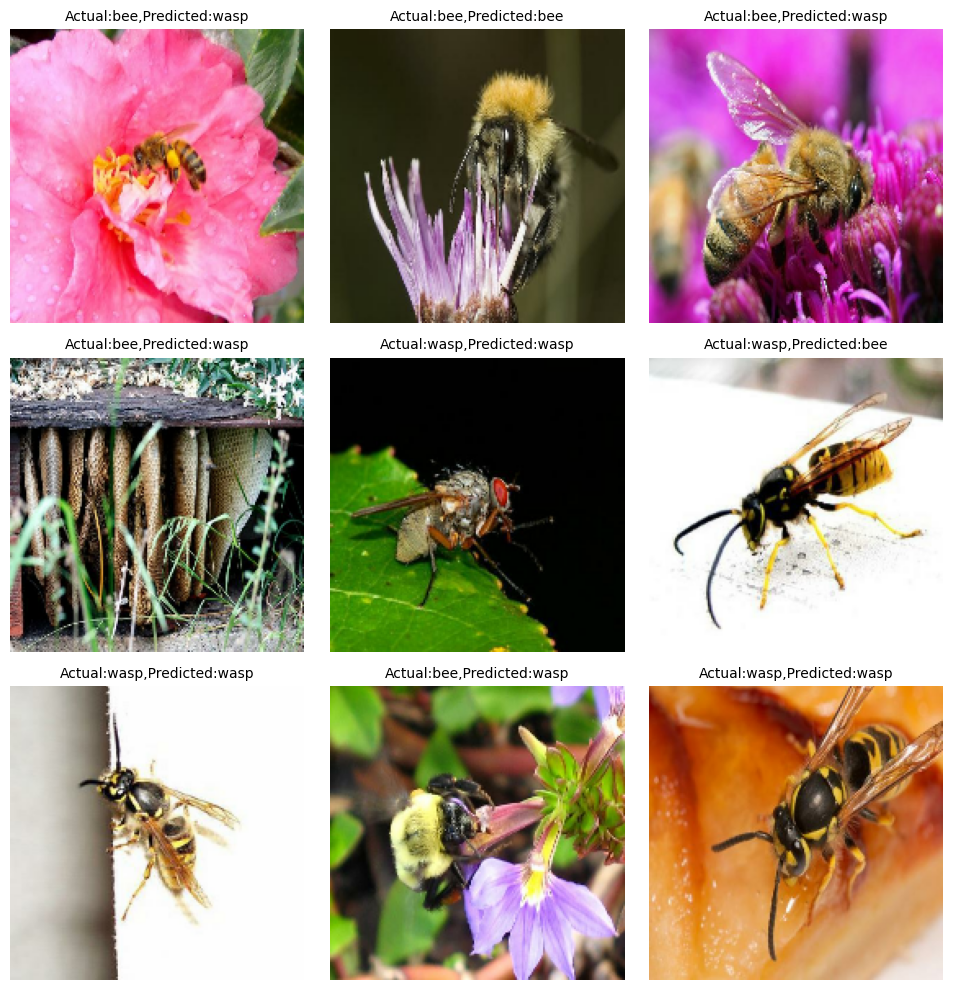

In [83]:
plt.figure(figsize=(10,10))
for images,labels in predicciones_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual:{predicciones_dataset.class_names[labels[i]]},Predicted:{predicciones_dataset.class_names[prediction_labels[i]]}",fontsize=10)
        plt.axis(False)
        plt.tight_layout()

# Conclusiones

Podemos concluir que el modelo generado con Data Augmentation y modificaciones en la arquitectura, que fue el último modelo implementado, demostró ser el más efectivo, como se mencionó anteriormente. Este rendimiento superior puede atribuirse a la generación de un mayor número de imágenes a través de Data Augmentation, así como a la aleatoria desactivación de neuronas mediante Dropout, lo que contribuye a reducir el sobreajuste. Estos factores combinados permitieron que el modelo tuviera un rendimiento notable al predecir correctamente 7 de las 9 imágenes, como se observa en la sección de resultados.

Por otro lado, al evaluar el modelo con imágenes de abejas y avispas que no fueron incluidas en ninguno de los conjuntos de datos (entrenamiento, prueba y validación), su rendimiento disminuye considerablemente. En este escenario, solo logra predecir de manera correcta 2 o 3 de las 7 imágenes evaluadas. Esto sugiere que el modelo enfrenta dificultades al diferenciar entre abejas y avispas cuando se presentan nuevas características, ya que las similitudes entre ambas especies hacen que el modelo sea más sensible a estas diferencias con datos inéditos.

En conclusión, aunque el modelo exhibe un rendimiento aceptable, es imperativo buscar mejoras adicionales para garantizar que mantenga su eficacia al enfrentarse a nuevos conjuntos de datos.